# 支持向量机的python实现

In [11]:
#ai8py.com
##############  支持向量机的核函数 ##################
#导入numpy
import numpy as np
#导入画图工具
import matplotlib.pyplot as plt
#导入支持向量机svm
from sklearn import svm
#导入数据集生成工具
from sklearn.datasets import make_blobs

#先创建50个数据点,让他们分为两类
X, y = make_blobs(n_samples=50, centers=2, random_state=6)
X

array([[  6.45519089,  -9.46356669],
       [  8.49142837,  -2.54974889],
       [  6.87151089, -10.18071547],
       [  9.49649411,  -3.7902975 ],
       [  7.67619643,  -2.82620437],
       [  6.3883927 ,  -9.25691447],
       [  9.24223825,  -3.88003098],
       [  5.95313618,  -6.82945967],
       [  6.86866543, -10.02289012],
       [  7.52132141,  -2.12266605],
       [  7.29573215,  -4.39392379],
       [  6.85086785,  -9.92422452],
       [  4.29225906,  -8.99220442],
       [  8.21597398,  -2.28672255],
       [  7.9683312 ,  -3.23125265],
       [  8.68185687,  -4.53683537],
       [  6.77811308,  -9.80940478],
       [  7.93333064,  -3.51553205],
       [  7.73046665,  -4.72901672],
       [  7.37578372,  -8.7241701 ],
       [  6.95292352,  -8.22624269],
       [  8.07502382,  -4.25949569],
       [  7.39169472,  -3.1266933 ],
       [  6.59823581, -10.20150177],
       [  7.27059007,  -4.84225716],
       [  8.71445065,  -2.41730491],
       [  5.73005848,  -4.19481136],
 

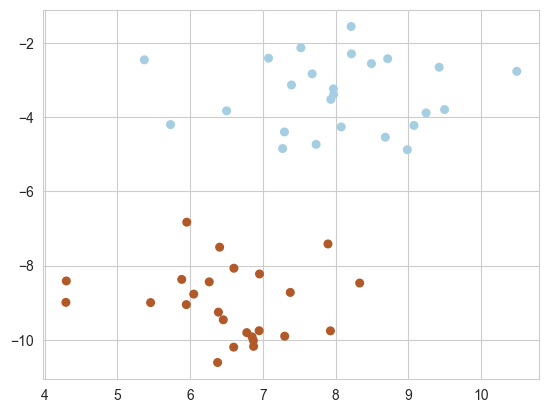

In [1]:
#创建一个线性内核的支持向量机模型
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)
#把数据点画出来
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)  # 让color=y,刚好通过颜色来区别两种文字

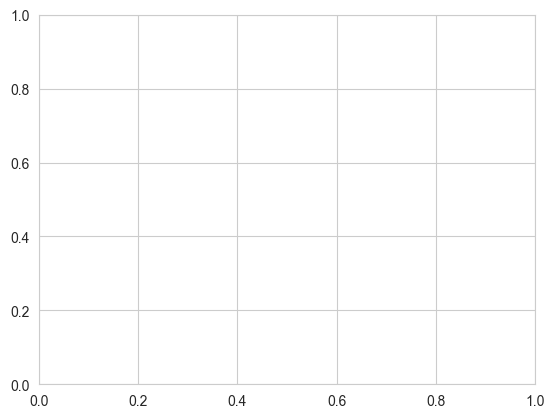

In [61]:
#建立图像坐标
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

In [6]:
#生成两个等差数列
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
XX.shape

(30, 30)

In [8]:
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

In [92]:
#把分类的决定边界画出来
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none')
plt.show()

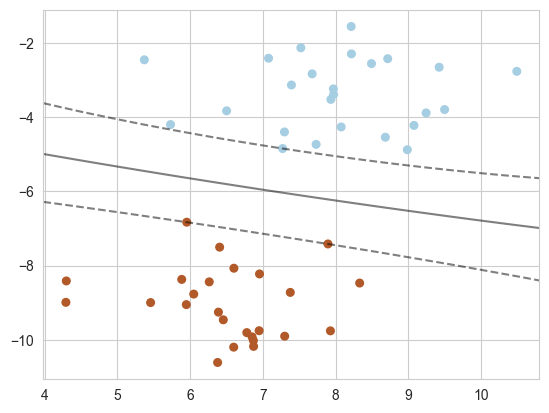

In [93]:
#创建一个RBF内核的支持向量机模型
clf_rbf = svm.SVC(kernel='rbf', C=1000)
clf_rbf.fit(X, y)

#把数据点画出来
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

#建立图像坐标
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
#生成两个等差数列
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T  #ndarray.T 表示矩阵转置
Z = clf_rbf.decision_function(xy).reshape(XX.shape)

#把分类的决定边界画出来
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none')
# clf.support_vector[],等价于X[:,0]
plt.show()

In [69]:
# 导入Iris数据集
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

"""
Iris也称鸢尾花卉数据集，是一类多重变量分析的数据集。数据集包含150个数据样本，分为3类，每类50个数据，每个数据包含4个属性。可通过花萼长度，花萼宽度，花瓣长度，花瓣宽度4个属性预测鸢尾花卉属于（Setosa，Versicolour，Virginica）三个种类中的哪一类。
"""

'\nIris也称鸢尾花卉数据集，是一类多重变量分析的数据集。数据集包含150个数据样本，分为3类，每类50个数据，每个数据包含4个属性。可通过花萼长度，花萼宽度，花瓣长度，花瓣宽度4个属性预测鸢尾花卉属于（Setosa，Versicolour，Virginica）三个种类中的哪一类。\n'

In [36]:
iris = load_iris().data[:, :2]
target = load_iris().target

In [40]:
x_train, x_test, y_train, y_test = train_test_split(iris, target, train_size=0.6, random_state=1)

In [41]:
model = svm.SVC(C=0.8, kernel='rbf', gamma=20, decision_function_shape='ovr')

`svm.SVC()`：创建支持向量机分类模型。
参数解读：
+ `kernel`:核函数，将n维分类数据经过kernel函数，映射到$n+1$维度空间，以便于数据的分类.包含以下几种类型：`linear`,`rbf`
+ `C`:越大越好， 但是可能产生过拟合
+ `gamma`：理论上越大越好，但是也会产生过拟合效果
+ `decision_funciton_shape`:`ovo`,即one v one,两两之间进行划分。`ovr`：one v rest，一对多。

In [51]:
model.fit(x_train, y_train)

SVC(C=0.8, gamma=20)

In [52]:
model.score(x_train, y_train)

0.8666666666666667

In [57]:
def show_accuracy(a, b):
    acc = a.ravel() == b.ravel()
    return np.mean(acc)

In [58]:
y_hat = model.predict(x_test)
show_accuracy(y_test, y_hat)

0.65

In [60]:
model.decision_function(x_train)

array([[ 2.22221768,  0.84556716, -0.17732545],
       [-0.21907548,  2.1945845 ,  1.11330483],
       [-0.21926475,  1.01235954,  2.21774158],
       [ 2.22221784,  0.84517656, -0.17702752],
       [ 2.22268531,  0.84496964, -0.17779385],
       [-0.21746101,  0.96333368,  2.22223421],
       [ 2.222223  ,  0.84553098, -0.17730841],
       [-0.21713288,  2.16934572,  1.15177255],
       [-0.19762535,  0.87198114,  2.2251005 ],
       [-0.22705329,  1.10879636,  2.20763405],
       [-0.22407236,  2.22223175,  1.01603689],
       [-0.20025843,  0.88961217,  2.2222218 ],
       [-0.22242013,  2.17388554,  1.15925117],
       [ 2.22223921,  0.84554574, -0.17735161],
       [-0.17762153,  2.22220992,  0.8459783 ],
       [-0.2195307 ,  1.08294207,  2.20501952],
       [-0.21746101,  0.96333368,  2.22223421],
       [-0.19365031,  2.22223217,  0.87320399],
       [-0.18284988,  0.84686111,  2.22457632],
       [-0.20135911,  2.22221695,  0.89279152],
       [ 2.22046827,  0.84803849, -0.175

In [61]:
model.predict(x_train)

array([0, 1, 2, 0, 0, 2, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2, 1, 2, 1, 0, 0,
       0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 2, 1, 2, 0, 0, 1, 0, 1, 0, 2, 1, 0, 2, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       2, 0])

In [68]:
x1_min, x1_max = iris[:, 0].min(), iris[:, 0].max()
x2_min, x2_max = iris[:, 1].min(), iris[:, 1].max()  # 获取坐标的上下限，分别是第0列，第一列的最大值最小值
X1, X2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]
grid_test = np.stack((X1.flat, X2.flat), axis=1)
# stack()函数可以实现将两组数据按位置一一对应凑成pair，1表示输出结果为纵列，0为横行。
grid_test

array([[4.3      , 2.       ],
       [4.3      , 2.0120603],
       [4.3      , 2.0241206],
       ...,
       [7.9      , 4.3758794],
       [7.9      , 4.3879397],
       [7.9      , 4.4      ]])

In [65]:
X1

array([[4.3       , 4.3       , 4.3       , ..., 4.3       , 4.3       ,
        4.3       ],
       [4.31809045, 4.31809045, 4.31809045, ..., 4.31809045, 4.31809045,
        4.31809045],
       [4.3361809 , 4.3361809 , 4.3361809 , ..., 4.3361809 , 4.3361809 ,
        4.3361809 ],
       ...,
       [7.8638191 , 7.8638191 , 7.8638191 , ..., 7.8638191 , 7.8638191 ,
        7.8638191 ],
       [7.88190955, 7.88190955, 7.88190955, ..., 7.88190955, 7.88190955,
        7.88190955],
       [7.9       , 7.9       , 7.9       , ..., 7.9       , 7.9       ,
        7.9       ]])

In [66]:
X2

array([[2.       , 2.0120603, 2.0241206, ..., 4.3758794, 4.3879397,
        4.4      ],
       [2.       , 2.0120603, 2.0241206, ..., 4.3758794, 4.3879397,
        4.4      ],
       [2.       , 2.0120603, 2.0241206, ..., 4.3758794, 4.3879397,
        4.4      ],
       ...,
       [2.       , 2.0120603, 2.0241206, ..., 4.3758794, 4.3879397,
        4.4      ],
       [2.       , 2.0120603, 2.0241206, ..., 4.3758794, 4.3879397,
        4.4      ],
       [2.       , 2.0120603, 2.0241206, ..., 4.3758794, 4.3879397,
        4.4      ]])

In [70]:
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [71]:
z = model.decision_function(grid_test)
z

array([[-0.0251641 ,  2.0509692 ,  0.97001355],
       [-0.01991936,  2.04878929,  0.9675338 ],
       [-0.01393008,  2.04634816,  0.96484818],
       ...,
       [-0.05565326,  2.06447111,  0.98737372],
       [-0.05565326,  2.06447111,  0.98737372],
       [-0.05565326,  2.06447111,  0.98737372]])

In [72]:
grid_hat = model.predict(grid_test)

ValueError: not enough values to unpack (expected 2, got 1)

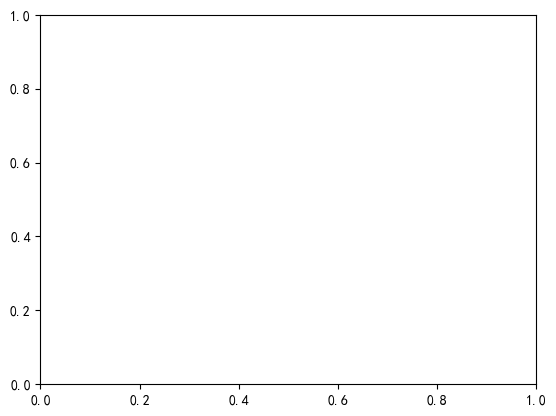

In [75]:
iris_feature = u'长度', u'宽度', u'花瓣长度', u'花瓣宽度'
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.pcolormesh(X1, X2, grid_hat, cmap=cm_light)
plt.scatter(iris[:, 0], iris[:, 1], c=y.ravel(), edgecolors='k', s=50, cmap=cm_dark)  # 样本
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test.ravel(), s=120, facecolors='none', zorder=10)  # 圈中测试集样本
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'鸢尾花SVM二特征分类', fontsize=15)
plt.grid()
plt.show()

### 习题1:蠓虫数据集

In [14]:
# Af: (1.24,1.27),(1.36,1.74),(1.38,1.64),(1.38,1.82)，(1.38,1.90)，
#     (1.40,1.70)， (1.48,1.82)，(1.54,1.82)，(1.56,2.08).
# Apf: (1.14,1.82),(1.18,1.96)，(1.20,1.86)，(1.26,2.00)，(1.28,2.00)，(1.30,1.96).

(150, 2)

In [28]:
li = [[1.24, 1.36, 1.38, 1.38, 1.38, 1.40, 1.48, 1.54, 1.56, 1.14, 1.18, 1.20, 1.26, 1.28, 1.30],
      [1.27, 1.74, 1.64, 1.82, 1.90, 1.70, 1.82, 1.82, 2.08, 1.82, 1.96, 1.86, 2.00, 2.00, 1.96]]
x = np.array(li).T
x
type1 = np.zeros((9, 1))
type2 = np.ones((6, 1))
target = np.vstack((type1, type2))
target

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

```python
#创建一个RBF内核的支持向量机模型
clf_rbf = svm.SVC(kernel='rbf', C=1000)
clf_rbf.fit(X, y)

#把数据点画出来
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

#建立图像坐标
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
#生成两个等差数列
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T     #ndarray.T 表示矩阵转置
Z = clf_rbf.decision_function(xy).reshape(XX.shape)

#把分类的决定边界画出来
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none')
# clf.support_vector[],等价于X[:,0]
plt.show()```

C:\Users\moonchild\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


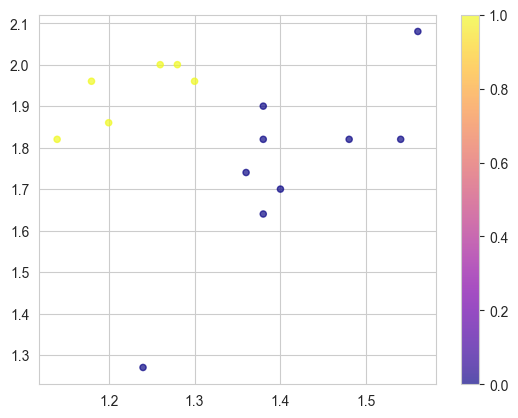

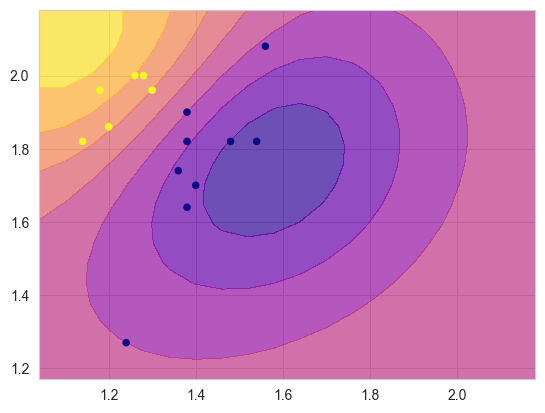

In [148]:
model = svm.SVC(kernel='rbf', C=64, decision_function_shape='ovr')
model.fit(x, target)
plt.scatter(x[:, 0], x[:, 1], c=target, cmap=plt.cm.plasma, s=20, alpha=0.7)
plt.colorbar()
plt.show()
ax = plt.gca()
theta = 0.1
xlim = x[:, 0].min() - theta, x[:, 1].max() + theta
ylim = x[:, 1].min() - theta, x[:, 1].max() + theta
xx = np.linspace(xlim[0], xlim[1], 20)
yy = np.linspace(ylim[0], ylim[1], 20)
x1, x2 = np.meshgrid(xx, yy)
xy = np.vstack([x1.ravel(), x2.ravel()]).T
z = model.decision_function(xy).reshape(x1.shape)
ax.contourf(x1, x2, z, cmap=plt.cm.plasma,alpha=0.7)
ax.scatter(x[:, 0], x[:, 1],  c=target, cmap=plt.cm.plasma, s=20)
# ax.colorbar(plt.cm.plasma)
plt.show()

### 习题2:乳腺癌数据集

In [1]:
from sklearn import svm
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
data = load_breast_cancer().data[:,:]
data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [3]:
target = load_breast_cancer().target
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
x_train,x_test,y_train,y_test = train_test_split(data,target,train_size=0.8)

In [7]:
model = svm.SVC(kernel='rbf',C=64)
model.fit(data,target)

SVC(C=64)

In [8]:
model.score(data,target)

0.9367311072056239

In [17]:
def show_accuracy(a,b):
    acc = a.ravel()==b.ravel()
    return np.mean(acc)

In [18]:
test = model.predict(x_test)
show_accuracy(test,y_test)    # 精度为90%

0.9035087719298246